In [2]:
from google.colab import files


uploaded = files.upload()


Saving 1_boston_housing.csv to 1_boston_housing.csv


In [4]:
import pandas as pd
df = pd.read_csv("./1_boston_housing.csv")

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [7]:
df.shape

(506, 14)

In [9]:
df.size

7084

In [10]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
from sklearn.model_selection import train_test_split

In [13]:
X = df.loc[:,df.columns != 'MEDV']
y = df.loc[:,df.columns =='MEDV']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state =123)


In [14]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(128, input_shape=(13, ),activation="relu",name="layer1"))
model.add(Dense(64 , activation="relu",name="dense2"))
model.add(Dense(1,activation="linear",name="dense_output"))

model.compile(optimizer="adam",loss="mse",metrics=['mae'])



In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 128)               1792      
                                                                 
 dense2 (Dense)              (None, 64)                8256      
                                                                 
 dense_output (Dense)        (None, 1)                 65        
                                                                 
Total params: 10113 (39.50 KB)
Trainable params: 10113 (39.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
history = model.fit(X_train,y_train,epochs = 200,validation_split=0.05,verbose=1)

Epoch 1/200
11/11 [==============================] - 0s 34ms/step - loss: 9.2061 - mae: 2.1255 - val_loss: 11.0012 - val_mae: 2.1685
Epoch 2/200
11/11 [==============================] - 0s 9ms/step - loss: 9.2369 - mae: 2.0882 - val_loss: 9.2303 - val_mae: 2.0462
Epoch 3/200
11/11 [==============================] - 0s 13ms/step - loss: 8.8164 - mae: 2.0284 - val_loss: 10.1696 - val_mae: 2.0206
Epoch 4/200
11/11 [==============================] - 0s 10ms/step - loss: 8.8990 - mae: 2.0255 - val_loss: 8.7828 - val_mae: 2.0824
Epoch 5/200
11/11 [==============================] - 0s 11ms/step - loss: 8.8857 - mae: 2.0664 - val_loss: 9.7384 - val_mae: 2.1197
Epoch 6/200
11/11 [==============================] - 0s 7ms/step - loss: 8.8730 - mae: 2.0310 - val_loss: 9.1614 - val_mae: 2.0123
Epoch 7/200
11/11 [==============================] - 0s 5ms/step - loss: 8.8741 - mae: 2.0409 - val_loss: 9.5719 - val_mae: 2.0367
Epoch 8/200
11/11 [==============================] - 0s 6ms/step - loss: 8.74

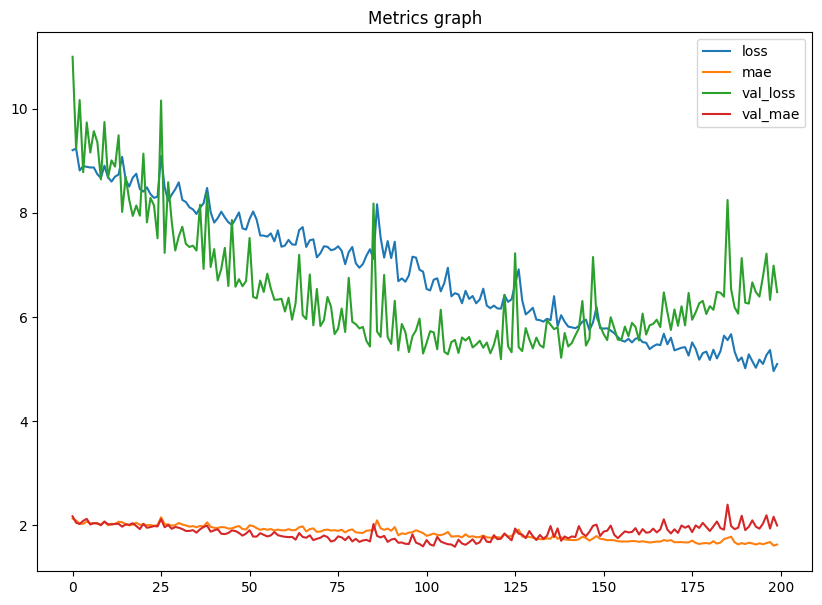

In [32]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Metrics graph")
plt.show()

In [33]:
y_pred = model.predict(X_test)

5/5 [==============================] - 0s 3ms/step


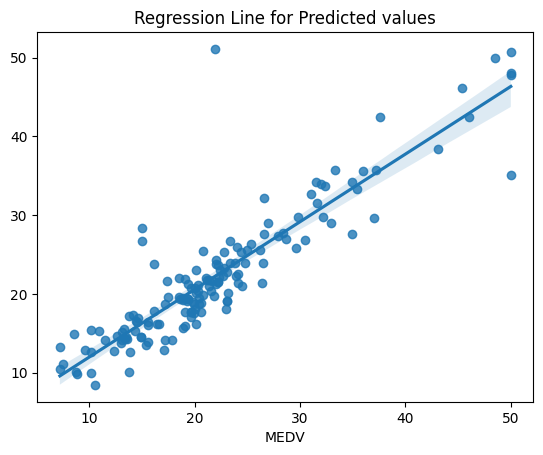

In [34]:
sns.regplot(x=y_test, y=y_pred)
plt.title("Regression Line for Predicted values")
plt.show()

In [35]:
mse_nn, mae_nn = model.evaluate(X_test, y_test)

print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

5/5 [==============================] - 0s 3ms/step - loss: 15.6388 - mae: 2.4032
Mean squared error on test data:  15.638779640197754
Mean absolute error on test data:  2.403158187866211
